In [1]:
%pylab inline

import plt_fmt
def matprint(M):
    """
    Makes a pretty printing of a square matrix
    """
    for item in M:
        for val in item:
            print('{0:.3f}'.format(val).rjust(6),end=" ")
        print('\n')
sin(.1*2*pi)/(2*pi)

Populating the interactive namespace from numpy and matplotlib


0.093548928378863902

In [ ]:

# ## OLD VERSION

# def full_amat(m,n,t=0.0,a=.5e-3, k=1e1, L=1.0,D=1.0,alp=1.0):
#     """
#     Calculate the time-dependent part of the state transition matrix
#     for the square well perturbed system
    
#     make sure that m and n are ints
    
#     TODO: Vectorize this properly
#     """
#     if m == n:
#         return t
#     elif mod(m-n, 2) != 0:
#         return t
#     elif mod(m+n, 2) != 0:
#         return t
#     else:
#         (lamb_m, lamb_n) = ( (ind*pi/L)**2 for ind in (m,n) )

#         denominator = (amat(m,n,a=a,k=k,L=L)*D*(lamb_m - lamb_n))**(1/alp)

#         numerator = gamma( (alp + 1)/alp ) - \
#         (1/alp)*dirty_gammainc(1/alp, (amat(m,n,a=a,k=k,L=L)*D*(lamb_m - lamb_n))*(t**alp))

#         element2 = numerator/denominator

#         if isnan(element2):
#             element2 = 0.0
#             print ("You got a NaN!: ")
#             print ((m,n))
#             print ((numerator,denominator))
#             print('\n')

#         return element2
# full_amat = vectorize(full_amat)

In [ ]:
# class PerturbedWell:
#     def __init__(self, nmodes, L, a, k, D, alp):
#         self.L = L
#         self.a = a
#         self.l = k
#         self.D = D
#         self.alp = alp
        
        
#     def

In [122]:
from scipy.special import gamma, gammainc
from math import factorial


from scipy.linalg import eig, inv

def expm_exact(mat):
    """
    Given a diagonalizable matrix, compute the exact matrix exponential
    """
    dd = eig(mat)[1]
    eigvals = eig(mat)[0]
    
    exped = diag( exp(eigvals) )
    
    return real(dd.dot( exped.dot(inv(dd)) ))

def dirty_gammainc(k, x):
    """
    A wrapper for the numpy incomplete gamma function that treats
    special cases separately from the general case
    
    k : int
    
    x : double
    """
    
    k = int(k)
    
    if k == 1:
        return exp(-x)
    elif k > 1:
        return gammainc(k, x)
    else:
        print ("Bad input")
        return nan
    
def dirtier_gammainc(k, x):
    """
    A full alternative to the numpy incomplete gamma function that
    avoids taking nasty integrals but which runs slower 
    and is also terrible.

    
    k : int
    
    x : double
    
    INCOMPLETE CURRENTLY
    """
    
    k = int(k)
    
    if k == 1:
        return exp(-x)
    elif k > 1:
        return gammainc(k, x)
    else:
        print ("Bad input")
        return nan

def amat(m,n,a=nan,k=nan,L=nan):
    """
    m : int
    
    n : int 
    
    Defaults are set so that strange behavior occurs unless the 
    value is explicitly passed
    
    Terrible rounding errors will occur if m, n are passed as doubles
    TODO: Vectorize this properly
    
    """
    
    if any(isnan((a,k,L))):
        print ("Parameter values were left unset")
    
    if m == n == 0:
#         return -k*a
#         return 0
        return -k*a

    
    if mod(n-m, 2) != 0:
        return 0
    
    if mod(n+m, 2) != 0:
        return 0
    
    if n==m:
        element1 = -k*a + -k*L*((-1)**n*sin(a/L*n*pi))/(n*pi)
        element1 = -k*L*((-1)**n*sin(a/L*n*pi))/(n*pi)
    elif (n != 0 and m==0):
        element1 = -2*sqrt(2)*k*L*cos(n*pi/2)*sin(a/L*n*pi/2)/(n*pi)
        element1 = 0
    elif (m != 0 and n==0):
        element1 = -2*sqrt(2)*k*L*cos(m*pi/2)*sin(a/L*m*pi/2)/(m*pi) 
        element1 = 0
    else:   
        p1 = int((n+m)/2)
        p2 = int((n-m)/2)


        element1 = -(k*L/(pi))*(   (-1)**p1*sin(pi*p1*a/L)/(2*p1)\
                               +  (-1)**p2*sin(pi*p2*a/L)/(2*p2)       )
        element1 = 0

    return element1
amat = vectorize(amat)


def full_amat(m,n,t=0.0,a=0.214, k=5.e-3, L=1.0,D=1.0e-1,alp=1.0):
    """
    Calculate the time-dependent part of the state transition matrix
    for the square well perturbed system
    
    make sure that m and n are ints
    
    TODO: Vectorize this properly
    """
    
    element1 = amat(m,n,a=a,k=k,L=L)
    
    if m == n:
        element2 = t

    else:
        (lamb_m, lamb_n) = ( (ind*pi/L)**2 for ind in (m,n) )

        denominator = D*(lamb_m - lamb_n)**(1/alp)

        numerator = gamma( (alp + 1)/alp ) - \
        (1/alp)*dirty_gammainc(1/alp, (D*(lamb_m - lamb_n))*(t**alp))

        element2 = numerator/denominator

    if isnan(element2):
        element2 = 0.0
        print ("You got a NaN!: ")
        print ((m,n))
        print ((numerator,denominator))
        print('\n')


    return element1*element2
full_amat = vectorize(full_amat)


def eigenfunctions(x, n, L=1.0):
    """
    The unperturbed eigenfunctions of the infinite square well
    
    x : array
        array of values over which to define the function
        
    n : int
        the mode to use
        
    L : double
        the width of the confining potential
        
    Returns
    -------
    
    out : array
        A vector sampling of the n^{th} eigenmode of the square well
    
    """
    if n == 0:
        return ones(len(x))
    elif n > 0:
        return sqrt(2)*cos(pi*n*(x/L + 1/2))
    else:
        print ("Bad arguments")
        return nan
    

    
def sum_eigen(x, coeff, L=1.0):
    """
    coeff : array
        a vector of coefficients of for the various modes
        of the square well
    
    x : array
        The sequence of values over which to construct the function
        
    Returns
    -------
    
    out : array
        A weighted combination of the provided modes
    
    """
    
    out = zeros(len(x))
    
    for (ind, c) in enumerate(coeff):
        out += c*eigenfunctions(x, ind, L=L)
    
    return out
 

def expm2(mat):
    """
    A simple alternative to numpy's matrix exponential function
    which uses truncation instead of Pade approximants
    """
    out = 1 + mat + (mat**2)/2 + (mat**3)/6 + (mat**4)/(24)
    
    return out


time: 0.0
time: 0.004
time: 0.008


/Users/william/miniconda/envs/spakenv/lib/python3.4/site-packages/matplotlib/font_manager.py:1282: UserWarning: findfont: Font family ['Myriad Pro Bold'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


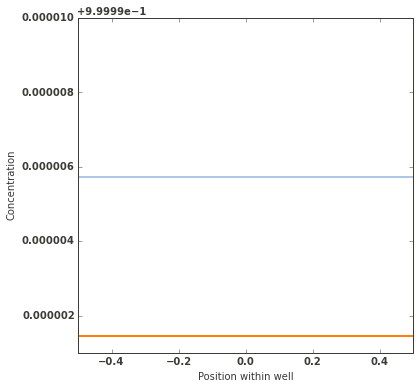

In [123]:
from scipy.linalg import expm

# Build a matrix with sufficient number of elements
xvals = linspace(-.5,.5,250)

n_modes = 20
(x,y) = meshgrid(range(n_modes), range(n_modes))

times = linspace(0,.008,3)

figure()
hold(True)
for time in times:
    Aintegral = full_amat(x,y, t=time)
    gmat_t = expm_exact(Aintegral)
    
    coeffs = zeros(n_modes)
    coeffs[0] = 1.0
    coeffs = gmat_t.dot(coeffs)
    sol = sum_eigen(xvals,coeffs)
    
#     gker = (1./7)*ones(7)
#     sol = convolve(sol, gker,'same')
    plot(xvals, sol)
    print("time: " + str(time))

xlim([-.5, .5])
# ylim([.955,1.05]) # good for k=5e1, 100 modes
# ylim([-.05,1.05]) # good for k=5e1, 100 modes

rcParams['font.family'] = 'Myriad Pro Bold'
xlabel('Position within well')
ylabel('Concentration')
savefig('bottom_out_smooth.pdf')